In [1]:
import requests 

In [2]:
pip install BeautifulSoup4

You are using pip version 19.0.3, however version 21.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup 

In [4]:
import csv 

In [5]:
import pandas as pd 

In [6]:
import matplotlib as mpl

In [7]:
import matplotlib.pyplot as plt 

In [108]:
def webscraper():
    url = "https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2021"
    r = requests.get(url)
    soup = BeautifulSoup(r.text,"html.parser")
    table = soup.find("table",{"class":"t-chart"})
    rows = table.findAll("tr")
#     #used to find all col
    headings = []
    for th in table.find("tr").find_all("th"):
        headings.append(th.text.strip())
    data_matrix = []
#     data_matrix.append(list(headings.stripped_strings))
    data_matrix.append(headings)
    print(data_matrix)
    
    for i in range(1,len(rows)):
        x = list(rows[i].stripped_strings)
        data_matrix.append(x)

    with open('Treasury_data.csv','w') as CSVfile:
        CSVWriter = csv.writer(CSVfile)
        for ml in data_matrix[62:]:
            CSVWriter.writerow(ml)
        
        
def make_chart():
    df = pd.read_csv("Treasury_data.csv")
    columns = ['Date','1 mo','2 mo','3 mo','6 mo','1 yr','2 yr','3 yr','5 yr','7 yr','10 yr','20 yr','30 yr']
    df.columns = columns 
    fig,(ax1,ax2)= plt.subplots(2,figsize=(30,20))
    ax1.plot(df.groupby("Date")[['1 mo', '2 mo', '3 mo', '6 mo']].sum(),label='Months')
    ax1.legend(columns[1:5])
    ax1.set(title = 'Treasury Data Per Month',ylabel = 'Yield Curve Rate',xlabel = 'Dates')
    ax2.plot(df.groupby("Date")[['1 yr', '2 yr', '3 yr', '5 yr',
       '7 yr', '10 yr', '20 yr', '30 yr']].sum(),label = 'Years')
    ax2.legend(columns[6:])
    ax2.set(title = 'Treasury Data Per Year',ylabel = 'Yield Curve Rate',xlabel = 'Dates')
    plt.show
    plt.savefig('charts/Treasury_curve.png')
    

In [109]:
df = pd.read_csv("Treasury_data.csv")
df.columns = ['Date','1 mo','2 mo','3 mo','6 mo','1 yr','2 yr','3 yr','5 yr','7 yr','10 yr','20 yr','30 yr']
df.groupby("Date")[['1 mo', '2 mo', '3 mo', '6 mo']].sum()

,1 mo,2 mo,3 mo,6 mo
Date,,,,
04/02/21,0.02,0.02,0.02,0.04
04/05/21,0.03,0.02,0.03,0.04
04/06/21,0.02,0.02,0.02,0.04
04/07/21,0.01,0.02,0.02,0.04
04/08/21,0.02,0.02,0.01,0.04
04/09/21,0.02,0.01,0.02,0.03
04/12/21,0.02,0.02,0.02,0.04
04/13/21,0.03,0.02,0.03,0.05
04/14/21,0.02,0.02,0.02,0.04


In [110]:
webscraper()

[['Date', '1 mo', '2 mo', '3 mo', '6 mo', '1 yr', '2 yr', '3 yr', '5 yr', '7 yr', '10 yr', '20 yr', '30 yr']]


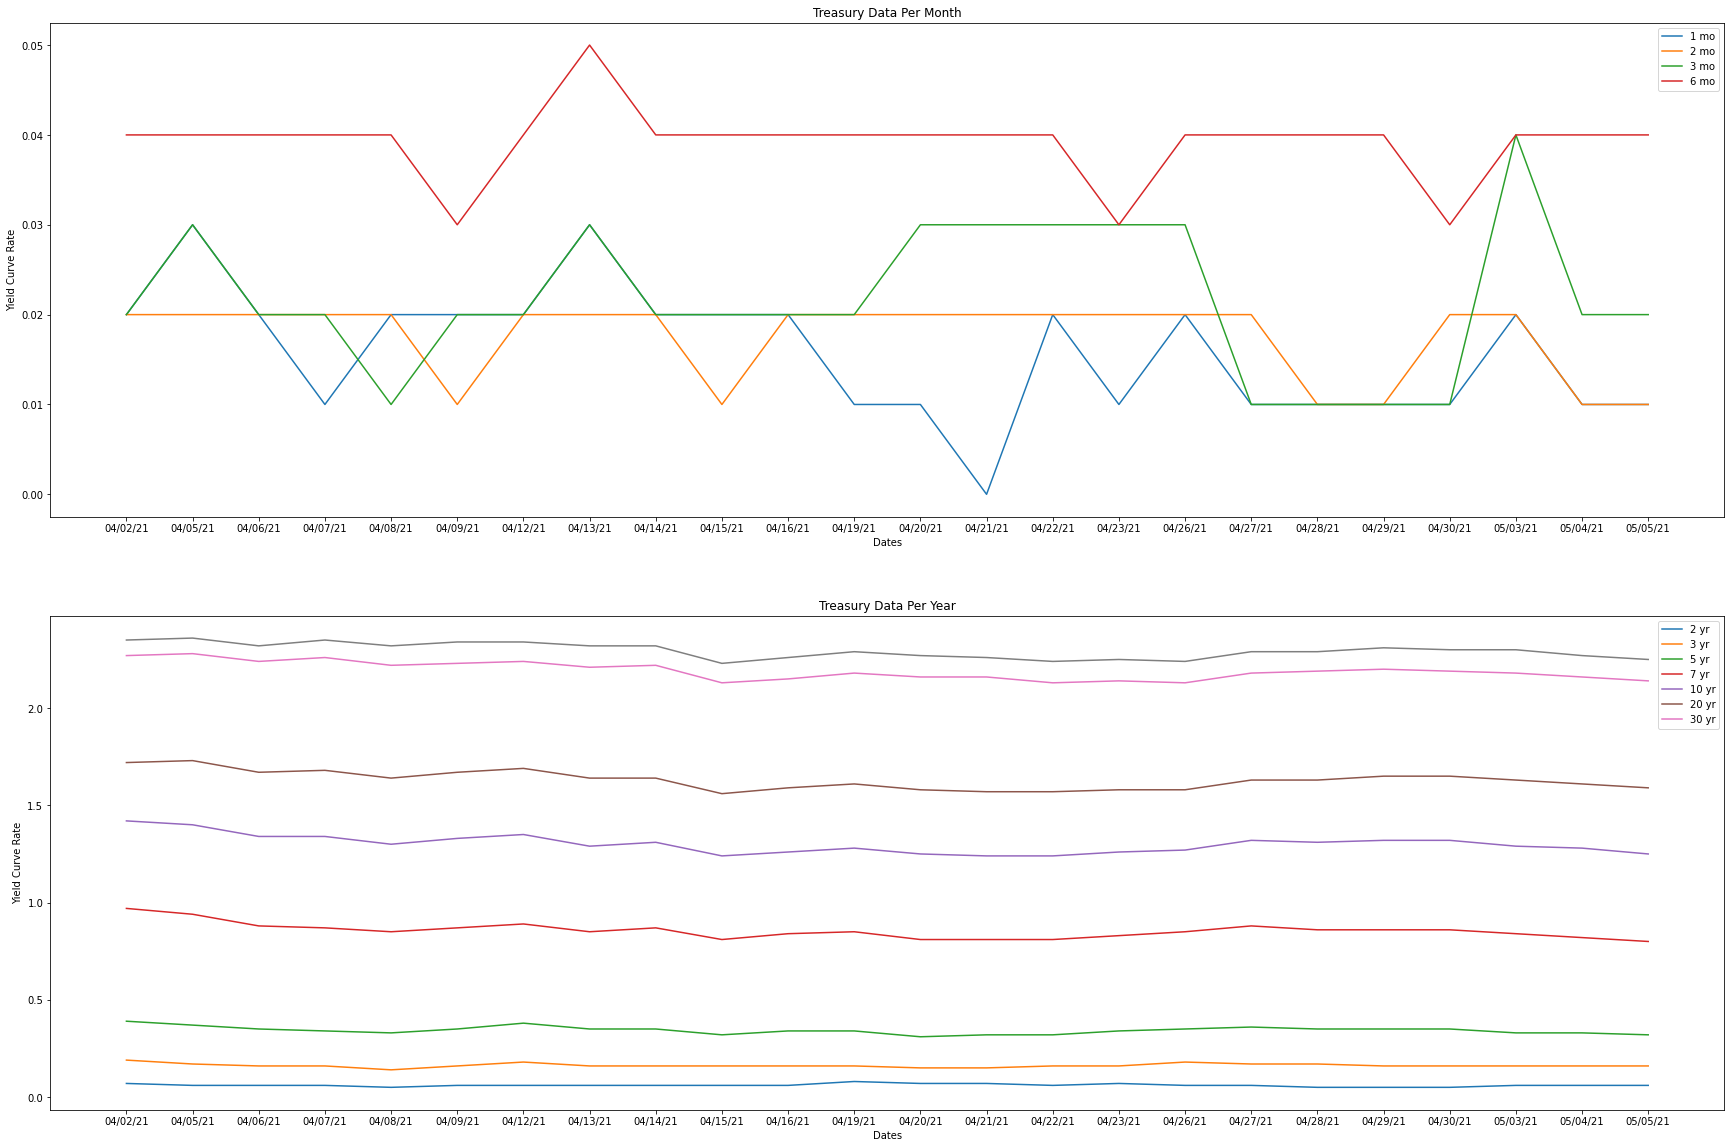

In [111]:
make_chart()

In [ ]:
import os
os.mkdir('charts')     